In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import random #To generate random numbers
import numpy as np 
import seaborn as sns #
import collections #specialized Datatype 
import operator
%matplotlib  

Using matplotlib backend: MacOSX


In [2]:
G= nx.read_gml('dataset.gml') 
#with open('EN.edges', 'rb') as inf:
    #next(inf, '')   # skip a line
    #G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")

In [3]:
def calculate_measure(G):  # to calclulate the matrix of the graph
    print(nx.info(G))

    betweenness = nx.betweenness_centrality(G, normalized=True).values() 
    closeness = nx.closeness_centrality(G).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G))

    if G.is_directed():
        calc_measure_dir(G)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G))  
    
  

In [4]:
calculate_measure(G)
print(nx.diameter(G) ) 

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 254
Max betweeness centrality:  0.5699890527836184
Average betweenness centrality 0.021881977671451357
Average closeness centrality 0.3893412505666164
Max closeness centrality:  0.6440677966101694
Average clustering 0.5731367499320134
Assortativity measures: 
 Coeff:  -0.16522513442236916
5


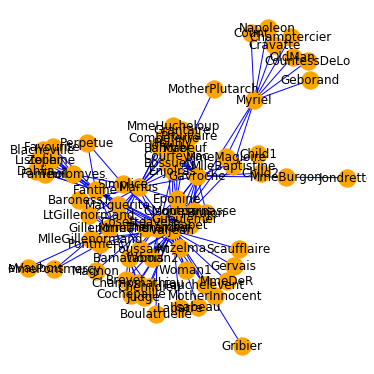

In [24]:
plt.figure(figsize=(5,5))

nx.draw(G, alpha=1, edge_color='blue', node_color='orange',with_labels=True, discard_old_labels=True)
plt.show()

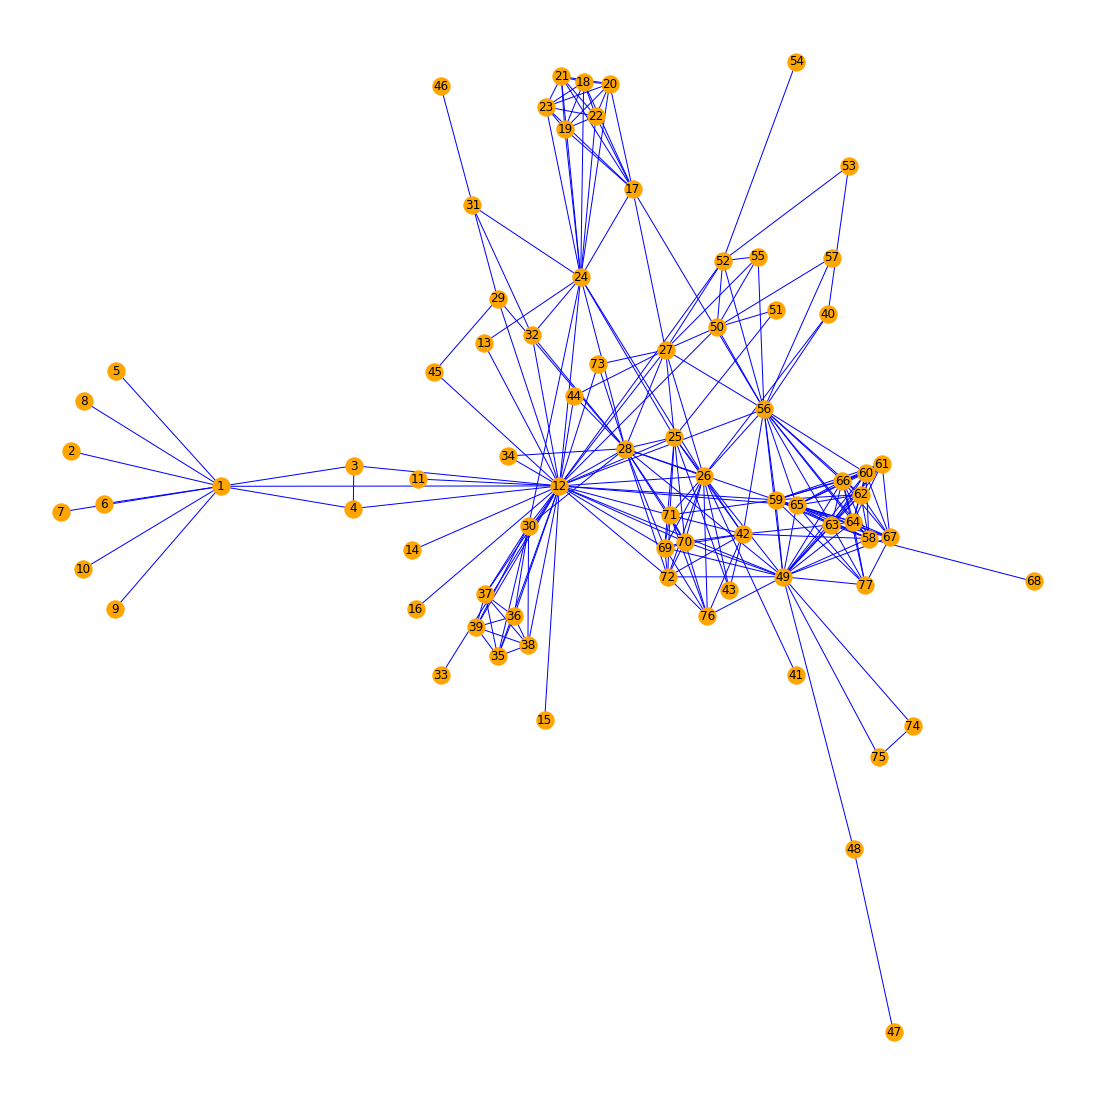

In [6]:
copy = G.copy()  # making a duplicate graph

G2=nx.convert_node_labels_to_integers(copy, first_label=1, ordering='default') #naive anonymization



plt.figure(figsize=(15,15))

nx.draw(G2, alpha=1, edge_color='blue', node_color='orange',with_labels=True, discard_old_labels=True)
plt.show()

In [7]:
p_new_connection = 0.10  #Adding 10% of the new nodes
p_remove_connection = 0.10 # Removing 10% of the older nodes

In [8]:


def add_and_remove_edges(G2, p_new_connection, p_remove_connection):    
    '''    
    for each node,    
      add a new connection to random other node, with prob p_new_connection,    
      remove a connection, with prob p_remove_connection    

    operates on G in-place    
    '''                
    new_edges = []    
    rem_edges = []    

    for node in G2.nodes():    
        # find the other nodes this one is connected to    
        connected = [to for (fr, to) in G2.edges(node)]    
        # and find the remainder of nodes, which are candidates for new edges   
        unconnected = [n for n in G2.nodes() if not n in connected]    

        # probabilistically add a random edge    
        if len(unconnected): # only try if new edge is possible    
            if random.random() < p_new_connection:    
                new = random.choice(unconnected)    
                G2.add_edge(node, new)    
                print ("\tnew edge:\t {} -- {}".format(node, new))    
                new_edges.append( (node, new) )    
                # book-keeping, in case both add and remove done in same cycle  
                unconnected.remove(new)    
                connected.append(new)    

        # probabilistically remove a random edge    
        if len(connected): # only try if an edge exists to remove    
            if random.random() < p_remove_connection:    
                remove = random.choice(connected)    
                G2.remove_edge(node, remove)    
                print ("\tedge removed:\t {} -- {}".format(node, remove))    
                rem_edges.append( (node, remove) )    
                # book-keeping, in case lists are important later?    
                connected.remove(remove)    
                unconnected.append(remove)    
    return rem_edges, new_edges 

rem_edges, new_edges = add_and_remove_edges(G2, p_new_connection, p_remove_connection)

	new edge:	 9 -- 20
	new edge:	 11 -- 14
	new edge:	 31 -- 26
	new edge:	 35 -- 54
	new edge:	 50 -- 65
	new edge:	 57 -- 6
	new edge:	 74 -- 66


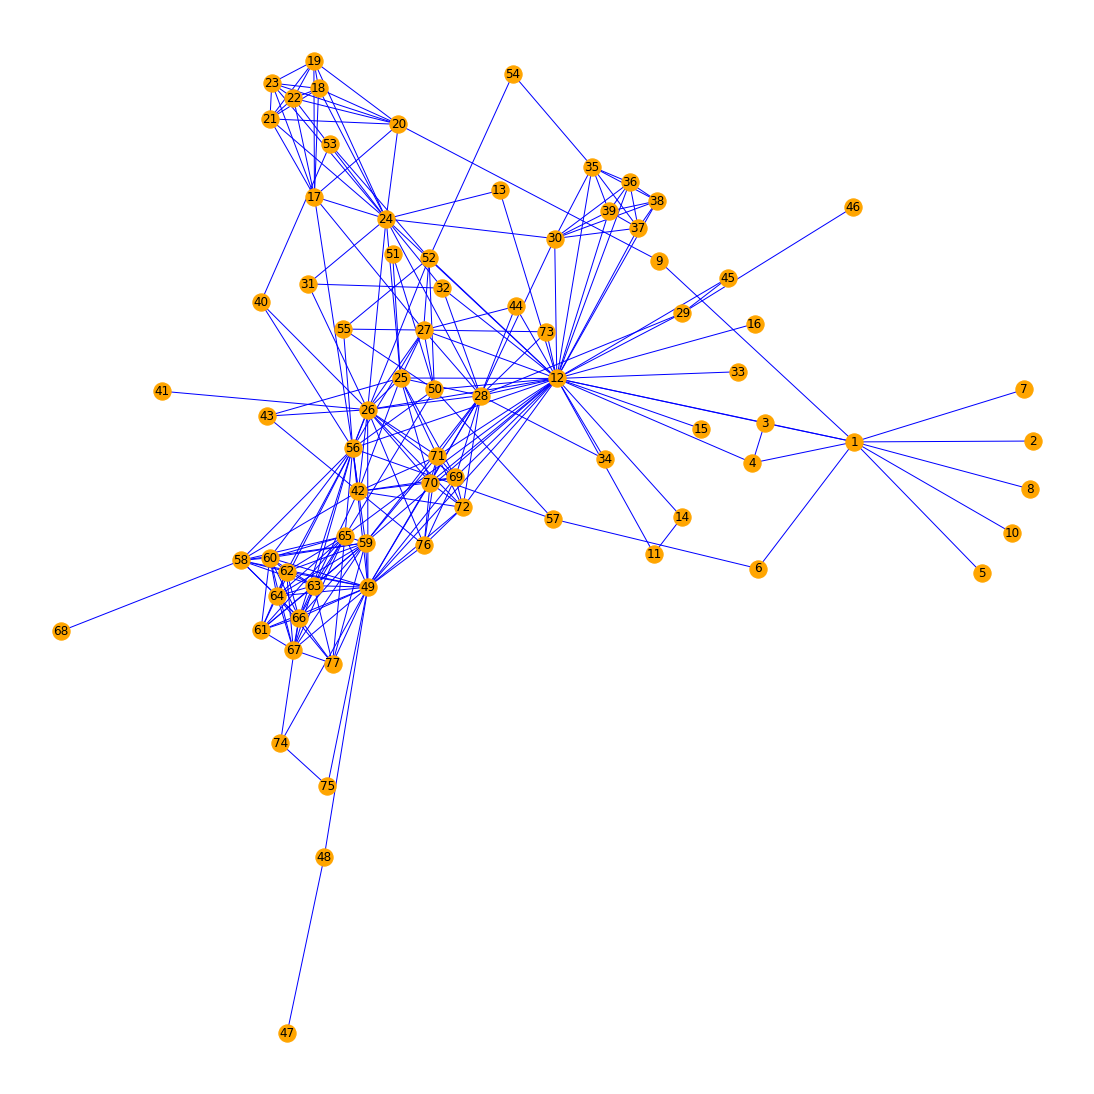

In [9]:
plt.figure(figsize=(15,15))

nx.draw(G2, alpha=1, edge_color='blue', node_color='orange',with_labels=True, discard_old_labels=True)
plt.show()

In [11]:
def calculate_measure(G2):  # to calclulate the matrix of the graph
    print(nx.info(G2))

    betweenness = nx.betweenness_centrality(G2, normalized=True).values() 
    closeness = nx.closeness_centrality(G2).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G2))

    if G.is_directed():
        calc_measure_dir(G2)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G2), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G2.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G2))

In [10]:
calculate_measure(G2) #for 0.10
print(nx.diameter(G2) ) 

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 261
Average degree:   6.7792
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 261
Max betweeness centrality:  0.5339850261251191
Average betweenness centrality 0.02144907723855092
Average closeness centrality 0.3935397225076455
Max closeness centrality:  0.6440677966101694
Average clustering 0.571286928128229
Assortativity measures: 
 Coeff:  -0.14708907027719487
5


In [12]:

ebunch1= [(8,11)]
G2.add_edges_from(ebunch1)
calculate_measure(G2)            #10 %
print(nx.diameter(G2) ) 


Name: 
Type: Graph
Number of nodes: 77
Number of edges: 262
Average degree:   6.8052
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 262
Max betweeness centrality:  0.5323851932094967
Average betweenness centrality 0.021435406698564596
Average closeness centrality 0.3936687017308656
Max closeness centrality:  0.6440677966101694
Average clustering 0.5626289194702203
Assortativity measures: 
 Coeff:  -0.14078711317007042
5


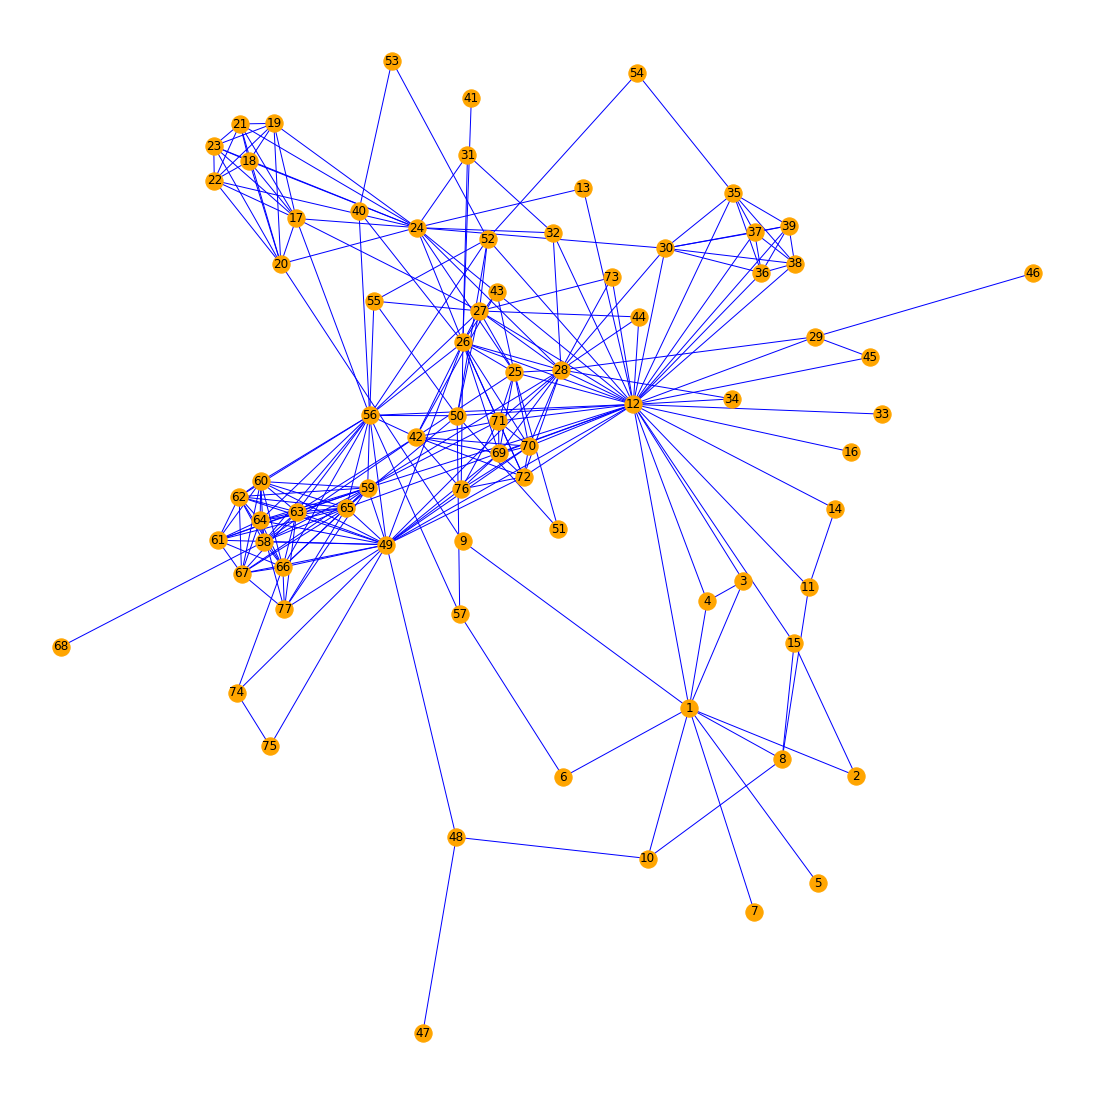

In [15]:
plt.figure(figsize=(15,15))

nx.draw(G2, alpha=1, edge_color='blue', node_color='orange',with_labels=True, discard_old_labels=True)
plt.show()

In [14]:
#sorted(G2.degree, key=lambda x: x[1], reverse=True) 

ebunch1= [(10,48),(15,2),(8,10),(8,15)]
G2.add_edges_from(ebunch1)
calculate_measure(G2)            #50 %
print(nx.diameter(G2) ) 


Name: 
Type: Graph
Number of nodes: 77
Number of edges: 266
Average degree:   6.9091
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 266
Max betweeness centrality:  0.5156690201858442
Average betweenness centrality 0.021239462292093867
Average closeness centrality 0.3953375581074574
Max closeness centrality:  0.6440677966101694
Average clustering 0.5694110262523272
Assortativity measures: 
 Coeff:  -0.12063901728480793
5


In [16]:
#sorted(G2.degree, key=lambda x: x[1], reverse=True) 

ebunch1= [(31,46),(51,46),(8,46)]
G2.add_edges_from(ebunch1)
calculate_measure(G2)            #100 %
print(nx.diameter(G2) ) 


Name: 
Type: Graph
Number of nodes: 77
Number of edges: 269
Average degree:   6.9870
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 77 269
Max betweeness centrality:  0.49920905779308655
Average betweenness centrality 0.021011619958988374
Average closeness centrality 0.39737664817419677
Max closeness centrality:  0.6440677966101694
Average clustering 0.564216221057522
Assortativity measures: 
 Coeff:  -0.11288761645701531
5


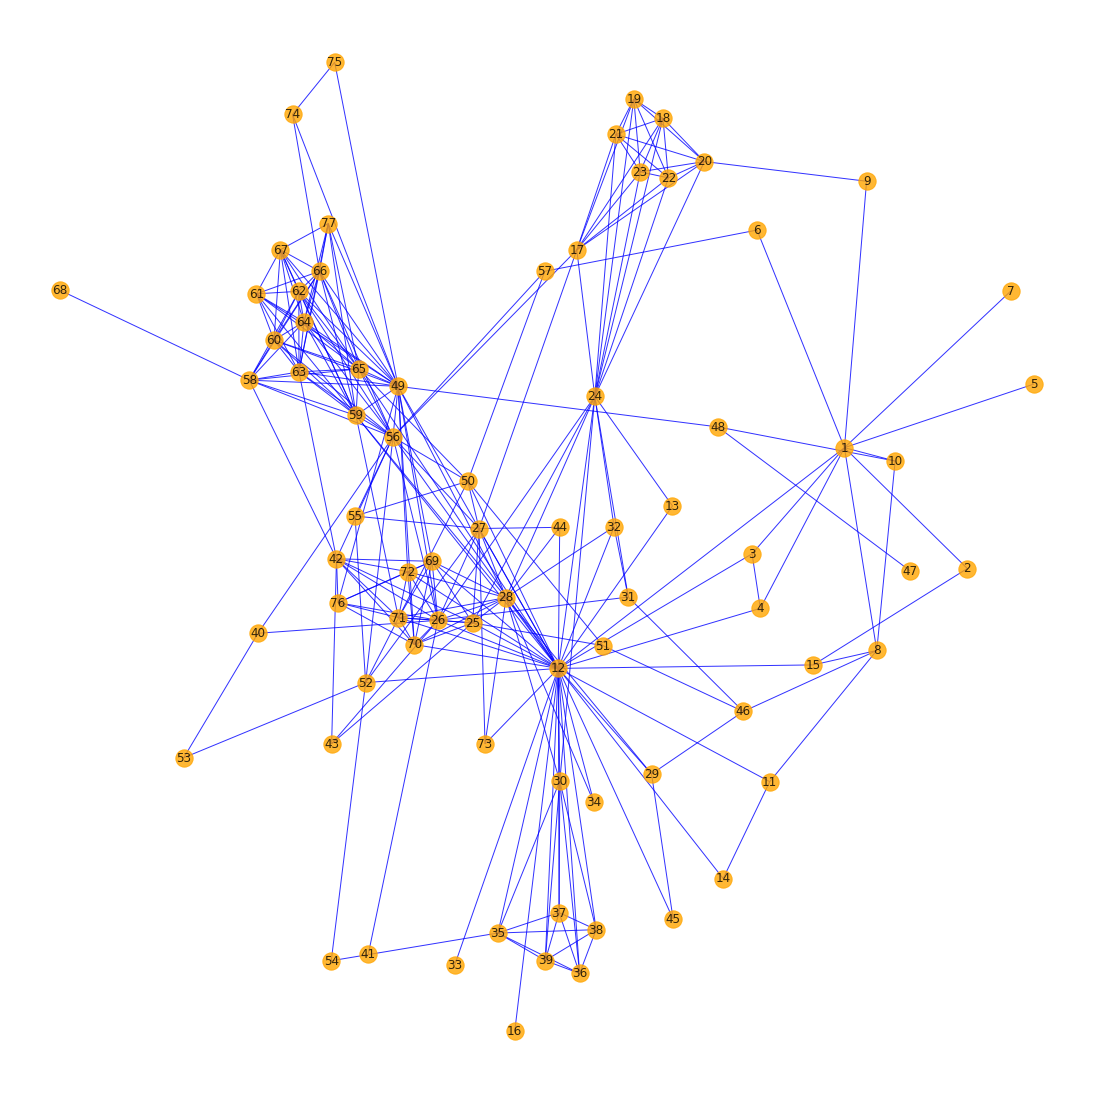

In [17]:
plt.figure(figsize=(15,15))

nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True,discard_old_labels=True)
plt.show()

In [18]:
sorted(G2.degree, key=lambda x: x[1], reverse=True) # highest connected nodes

[(12, 36),
 (49, 22),
 (56, 19),
 (26, 17),
 (28, 17),
 (24, 15),
 (59, 15),
 (65, 14),
 (63, 13),
 (66, 13),
 (64, 12),
 (25, 11),
 (27, 11),
 (42, 11),
 (58, 11),
 (60, 11),
 (62, 11),
 (1, 10),
 (67, 10),
 (69, 10),
 (70, 10),
 (71, 10),
 (17, 9),
 (61, 9),
 (72, 9),
 (20, 8),
 (30, 8),
 (50, 8),
 (18, 7),
 (19, 7),
 (21, 7),
 (22, 7),
 (23, 7),
 (35, 7),
 (52, 7),
 (76, 7),
 (77, 7),
 (36, 6),
 (37, 6),
 (38, 6),
 (39, 6),
 (8, 5),
 (29, 4),
 (31, 4),
 (32, 4),
 (46, 4),
 (55, 4),
 (3, 3),
 (4, 3),
 (10, 3),
 (11, 3),
 (15, 3),
 (40, 3),
 (43, 3),
 (44, 3),
 (48, 3),
 (51, 3),
 (57, 3),
 (73, 3),
 (74, 3),
 (2, 2),
 (6, 2),
 (9, 2),
 (13, 2),
 (14, 2),
 (34, 2),
 (45, 2),
 (53, 2),
 (54, 2),
 (75, 2),
 (5, 1),
 (7, 1),
 (16, 1),
 (33, 1),
 (41, 1),
 (47, 1),
 (68, 1)]

In [19]:
#Neighbours of G2
def neighbors(G2): # Trying to print out the neighbours of the nodes
 
 return list(G2.neighbors(12))
print(" neighbours = ", neighbors(G2))  

 neighbours =  [1, 3, 4, 11, 13, 14, 15, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 44, 45, 49, 50, 52, 56, 59, 65, 69, 70, 71, 72, 73]


In [20]:
G2.node[12] # H0 query returns labels of  node


{}

In [21]:
G2.degree(12) # H1 query returns degree of specified node 


36

In [22]:
list(G2.degree((G2.neighbors(12)) )  ) # H2 returns the degrees of node neighbors
    

[(1, 10),
 (3, 3),
 (4, 3),
 (11, 3),
 (13, 2),
 (14, 2),
 (15, 3),
 (16, 1),
 (24, 15),
 (25, 11),
 (26, 17),
 (27, 11),
 (28, 17),
 (29, 4),
 (30, 8),
 (32, 4),
 (33, 1),
 (34, 2),
 (35, 7),
 (36, 6),
 (37, 6),
 (38, 6),
 (39, 6),
 (44, 3),
 (45, 2),
 (49, 22),
 (50, 8),
 (52, 7),
 (56, 19),
 (59, 15),
 (65, 14),
 (69, 10),
 (70, 10),
 (71, 10),
 (72, 9),
 (73, 3)]

In [23]:
list(nx.bfs_edges(G2, 12)) #Breadth-First Search

[(12, 1),
 (12, 3),
 (12, 4),
 (12, 11),
 (12, 13),
 (12, 14),
 (12, 15),
 (12, 16),
 (12, 24),
 (12, 25),
 (12, 26),
 (12, 27),
 (12, 28),
 (12, 29),
 (12, 30),
 (12, 32),
 (12, 33),
 (12, 34),
 (12, 35),
 (12, 36),
 (12, 37),
 (12, 38),
 (12, 39),
 (12, 44),
 (12, 45),
 (12, 49),
 (12, 50),
 (12, 52),
 (12, 56),
 (12, 59),
 (12, 65),
 (12, 69),
 (12, 70),
 (12, 71),
 (12, 72),
 (12, 73),
 (1, 2),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (24, 17),
 (24, 18),
 (24, 19),
 (24, 20),
 (24, 21),
 (24, 22),
 (24, 23),
 (24, 31),
 (25, 42),
 (25, 43),
 (25, 51),
 (26, 40),
 (26, 41),
 (26, 76),
 (27, 55),
 (29, 46),
 (35, 54),
 (49, 48),
 (49, 58),
 (49, 60),
 (49, 61),
 (49, 62),
 (49, 63),
 (49, 64),
 (49, 66),
 (49, 67),
 (49, 74),
 (49, 75),
 (49, 77),
 (50, 57),
 (52, 53),
 (48, 47),
 (58, 68)]